In [1]:
#导入包
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [2]:
#导入数据及预处理数据
data = pd.read_excel(r'C:\Users\Administrator\Desktop\test\anhuicpi.xlsx')
print(data)
lookback = 4
x = []
y = []
for i in range(lookback,len(data)):
    x.append(data.iloc[i-lookback:i,1])
    y.append(data.iloc[i,1])
x = np.array(x)
y = np.array(y)

       time       cpi
0   12-2017  101.3522
1   01-2018  101.4218
2   02-2018  103.2000
3   03-2018  101.7085
4   04-2018  101.0774
..      ...       ...
71  11-2023   99.6000
72  12-2023  100.0000
73  01-2024   99.4000
74  02-2024  100.8000
75  03-2024   99.9000

[76 rows x 2 columns]


In [3]:
#划分数据集
size_x = int(len(x) * 0.8)
size_y = int(len(y) * 0.8)
x_train, x_test, y_train, y_test = x[0:size_x], x[size_x:len(x)], y[0:size_y], y[size_y:len(x)]
print(y_train)
print(x_train)

[101.0774 101.2073 101.4305 102.0447 102.2448 102.5603 102.4044 102.2611
 101.9532 101.1722 101.2907 102.5434 102.9581 102.8641 102.4272 102.3047
 102.5047 102.6746 103.4786 104.231  104.099  105.4301 104.747  103.6407
 102.6804 102.1509 103.0974 103.5662 102.7309 101.9052 100.4     99.6
 100.5     99.9     99.9    100.7    101.1    101.5    100.9    100.7
 100.8    100.9    101.8    102.7    101.9    101.3    101.3    102.
 102.9    102.4    102.7    103.     102.6    102.7    102.1    101.2
 101.3   ]
[[101.3522 101.4218 103.2    101.7085]
 [101.4218 103.2    101.7085 101.0774]
 [103.2    101.7085 101.0774 101.2073]
 [101.7085 101.0774 101.2073 101.4305]
 [101.0774 101.2073 101.4305 102.0447]
 [101.2073 101.4305 102.0447 102.2448]
 [101.4305 102.0447 102.2448 102.5603]
 [102.0447 102.2448 102.5603 102.4044]
 [102.2448 102.5603 102.4044 102.2611]
 [102.5603 102.4044 102.2611 101.9532]
 [102.4044 102.2611 101.9532 101.1722]
 [102.2611 101.9532 101.1722 101.2907]
 [101.9532 101.1722 101

2024-05-12 10:31:48,024 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|████████████████████████████████████████████████████████████|100/100, best_cost=0.521
2024-05-12 10:31:58,090 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.521029352559691, best pos: [43.23175329  0.3240269 ]


最优参数： [43.23175329  0.3240269 ]


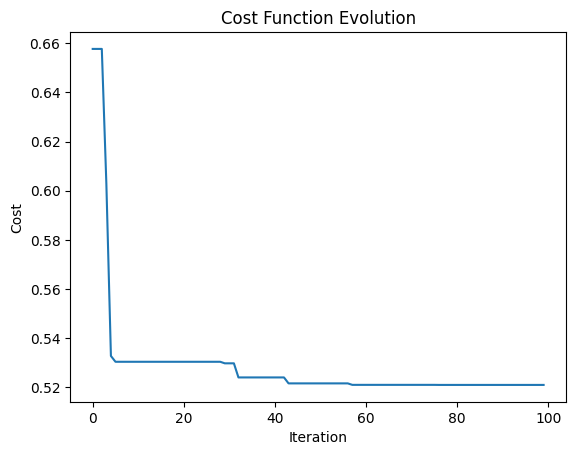

SVR(C=43.2317532886253, gamma=0.3240269005941848)

In [4]:
# 4. 创建和训练SVR模型
import PSO_SVR

svr_model = PSO_SVR.optimize_svm(x_train, y_train, x_test, y_test)

svr_model.fit(x_train, y_train)

In [5]:
#使用模型进行预测
x_next = [data[-lookback:].values[i, 1] for i in range(len(data[-lookback:]))]
y_next = svr_model.predict([x_next])

y_pred1 = svr_model.predict(x_train)
y_pred = svr_model.predict(x_test)
y_label_pre = list(y_pred1)
for i in y_pred:
    y_label_pre.append(i)
y_label_pre.append(y_next[0])
y_label_tru = list(y_train)
for i in y_test:
    y_label_tru.append(i)
print(y_label_tru)

[101.0774, 101.2073, 101.4305, 102.0447, 102.2448, 102.5603, 102.4044, 102.2611, 101.9532, 101.1722, 101.2907, 102.5434, 102.9581, 102.8641, 102.4272, 102.3047, 102.5047, 102.6746, 103.4786, 104.231, 104.099, 105.4301, 104.747, 103.6407, 102.6804, 102.1509, 103.0974, 103.5662, 102.7309, 101.9052, 100.4, 99.6, 100.5, 99.9, 99.9, 100.7, 101.1, 101.5, 100.9, 100.7, 100.8, 100.9, 101.8, 102.7, 101.9, 101.3, 101.3, 102.0, 102.9, 102.4, 102.7, 103.0, 102.6, 102.7, 102.1, 101.2, 101.3, 101.6, 100.8, 100.4, 99.7, 100.0, 99.9, 99.4, 99.9, 99.9, 99.8, 99.6, 100.0, 99.4, 100.8, 99.9]


均方误差:0.521029352559691
R2 =  -0.5727341605303387
MAE =  0.6221946275277408


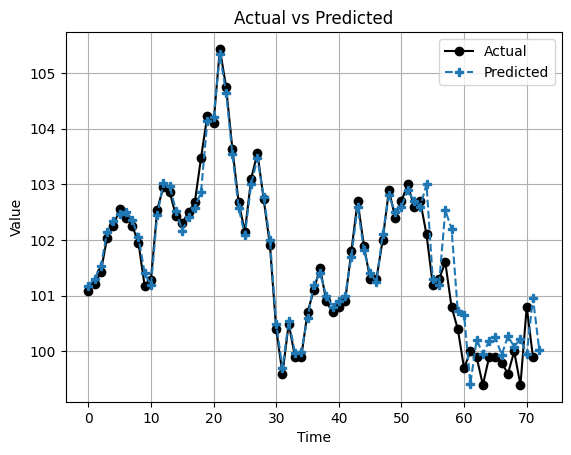

In [6]:
mse = mean_squared_error(y_test, y_pred)
print(f'均方误差:{mse}')
print("R2 = ", metrics.r2_score(y_test, y_pred))  # R2
print("MAE = ", mean_absolute_error(y_test, y_pred))  # R2
import matplotlib.pyplot as plt

plt.plot(y_label_tru, "o-k")
plt.plot(y_label_pre, "P--")
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Actual', 'Predicted'])
plt.title('Actual vs Predicted')
plt.grid()
plt.show()